# Importing all the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the Dataset and printing the first initial value

In [2]:
df = pd.read_csv("Cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Checking the shape
df.shape

(8128, 13)

In [4]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Quick analysis of each column
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Renaming the columns 

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
# Renaming and replacing the columns according to convenience
df.rename(columns ={
    'name':'brand'
}, inplace=True)

In [8]:
#Veryfying if the columns have been renamed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [9]:
#Checking the unique values in owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

For the feature owner. mapping First Owner to 1, Second Owner to 2, Third Owner to 3, Fourth & Above Owner to 4 and Test Drive Car to 5 i.e. Label Enconding. Label Encoding is defined as the representation of categorical variables into integers

In [10]:
# Defining a mapping of values to numerical encodings
encoding_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

In [11]:
# Encoding the labels in the column 'owner'
df['owner'] = df['owner'].map(encoding_map)

In [12]:
#Veryfying the output of the label owner
df["owner"].unique()

array([1, 2, 3, 4, 5])

Removing the rows with the fuel of value of fuels with LPG and CNG``

In [13]:
# Getting all the unique values of column fuel
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [14]:
# Saving the values to remove in a array
values_to_remove=['CNG','LPG']

In [15]:
# Reoving the rows with the specified values and reflecting it in the dataframe
df =df[~df['fuel'].isin(values_to_remove)]

In [16]:
# Checking the values in the column fuel
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Removing kmpl in feature mileage and converting the coulmn to numerical type in this case float

In [17]:
# Getting the some values of the feature mileage
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [18]:
# Removing the kmph frpm the records in the column mileage using split such that only the first part of the string is taken while the second part i.e. the kmph (unit) is discarded
df['mileage']=df['mileage'].str.split().str[0]

In [19]:
# Converting the data type of mileage feature to float from string
df['mileage']=df['mileage'].astype(float)

In [20]:
# Veryfying the type of the column mileage
df['mileage'].dtypes

dtype('float64')

Removing "CC" from the feature engine and coverting the column to numerical (float) type

In [21]:
# Getting the unique values of the feature engine
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [22]:
# Removing the CC frpm the records in the column engine using split such that only the first part of the string is taken while the second part i.e. the CC (unit) is discarded
df['engine']= df.engine.str.split().str[0]

In [23]:
# Veryfying the values of engine column
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [24]:
# Converting the type of mileage column to float from object (string)
df['engine']=df['engine'].astype(float)
# Veryfying the type of the column engine
df['engine'].dtypes

dtype('float64')

Removing "bhp" from the feature max_power named as power and coverting the column to numerical (float) type

In [25]:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [26]:
# Removing the bhp frpm the records in the column max_power using split such that only the first part of the string is taken while the second part i.e. thebhp (unit) is discarded

df['max_power']=df.max_power.str.split().str[0]

#veryfying the output
df['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [27]:
# Converting max_power to float
df['max_power']=df['max_power'].astype('float')

## Veryfying the type of the column max_power aka power
df['max_power'].dtypes

dtype('float64')

Taking only the first part of the feature brand

In [28]:
# Analysing the column brand
df['brand'].head()

0          Maruti Swift Dzire VDI
1    Skoda Rapid 1.5 TDI Ambition
2        Honda City 2017-2020 EXi
3       Hyundai i20 Sportz Diesel
4          Maruti Swift VXI BSIII
Name: brand, dtype: object

In [29]:
# Splitting the brand feature and only taking the first part
df['brand']= df.brand.str.split().str[0]
#Veryfying the ouput
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

Removing the feature torque from the dataframe

In [30]:
# Removing the column torque using the drop column function
df=df.drop(['torque'],axis=1)


Removing the records with the owner as Test Drive Car i.e. owner =5 (according to our encoding)

In [31]:
# Using the query method of data frame which makes a copy from the original dataframe with the query (where owner is not 5 i.e. Test Drive Car) as string and saving it to our dataframe
df=df.query('owner != 5')

In [32]:
# Veryfying the output of the dataframe
df['owner'].unique()

array([1, 2, 3, 4])

In [33]:
# After the completion of all specified tasks

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [34]:
# Resetting the index to prepare for our one hot encoding of the brand (name) column
df.reset_index(inplace=True)

Label Encoding/One Hot Label Encoding our categorical columns
Previously the brand column was label encoded however as linear regression (what we are doing this time) assumes a ordinality among the encoded brands one hot encoding is used to prevent biasness to a particular brand of car

In [35]:

from sklearn.preprocessing import OneHotEncoder
"""
        One-hot encodes a categorical feature in a DataFrame.

    Parameters:
    - encoder (OneHotEncoder): The OneHotEncoder object fitted on the training data.
    - dataframe (DataFrame): The DataFrame containing the feature to be one-hot encoded.
    - feature (str): The name of the categorical feature to be encoded.

    Returns:
    - DataFrame: A new DataFrame with the specified feature one-hot encoded and the original feature dropped.
    """

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):
    # Use the encoder to transform the specified feature
    encoded = encoder.transform(dataframe[[feature]])

    # Extract the category labels for the feature
    categories = encoder.categories_[0]
    # Create a DataFrame with one-hot encoded columns and category labels as column names
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    # Concatenate the original DataFrame and the one-hot encoded DataFrame
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    # Drop the original feature from the resulting DataFrame
    return concat_dataframe.drop(feature, axis=1)
    
    

In [36]:
# Since 'brand' has multiple value and to prevent the ordinality that comes with it, one-hot encoding is applied to it
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder_fuel = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_seller_type = LabelEncoder()

# Fitting and transforming the the required column
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])

In [38]:
# Dropping thr column index
df.drop(columns='index', inplace=True)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,2013,320000,110000,1,1,1,1,18.50,1197.0,82.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,2007,135000,119000,0,1,1,4,16.80,1493.0,110.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,2009,382000,120000,0,1,1,1,19.30,1248.0,73.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,2013,290000,25000,0,1,1,1,23.57,1396.0,70.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
# Excluding one-hot encoded columns
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

# B. Exploratory Data Analysis
Now we are going to explore the data and try to find features which will be required for our further analysis

# B.1 Univaraiate Analysis
Performing best on single specific columns in order to get count and other information


# Distribution Plot
Obtaining the distribution of count of columns

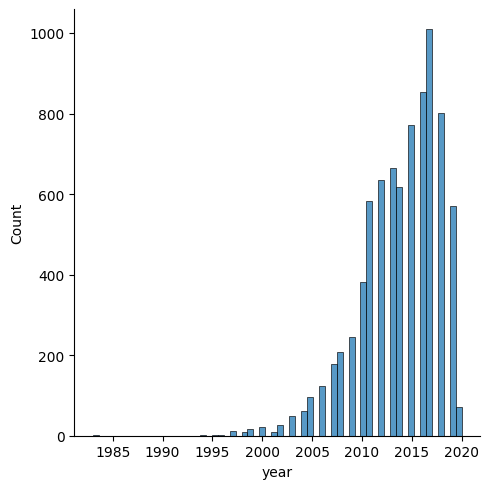

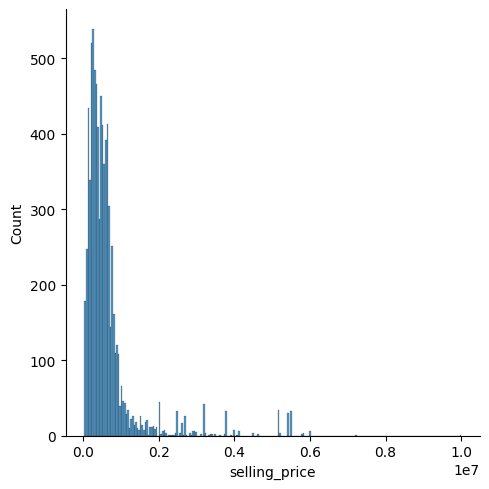

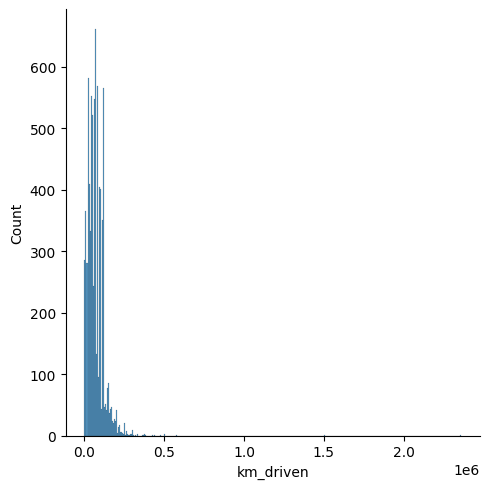

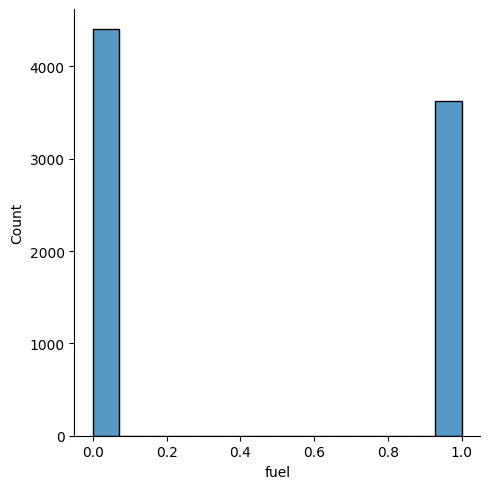

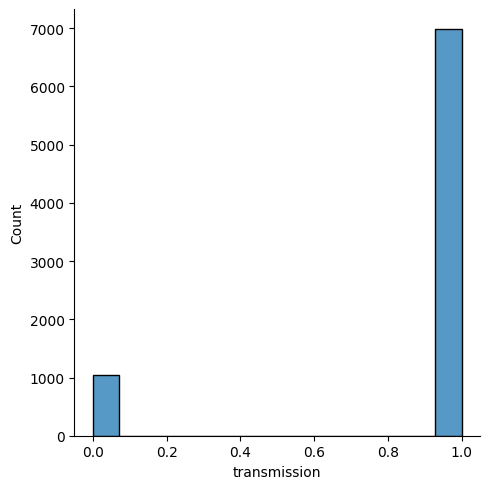

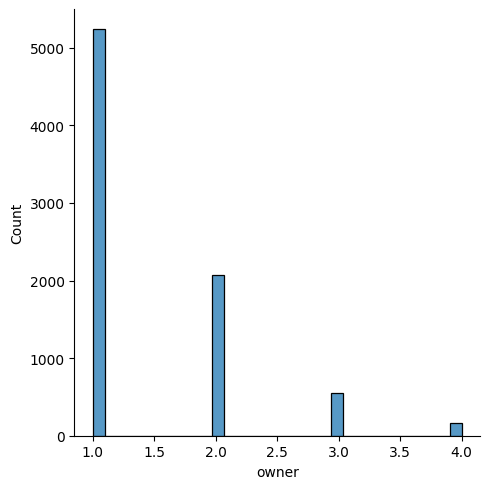

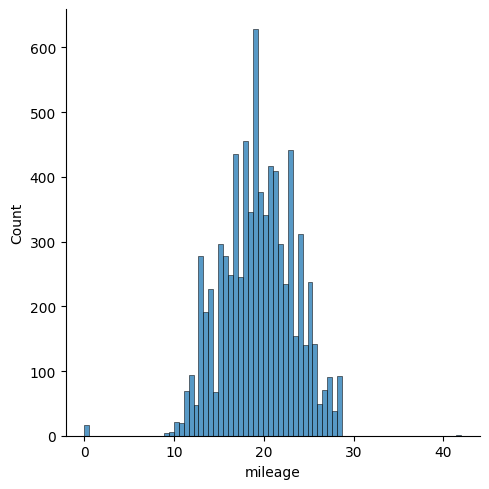

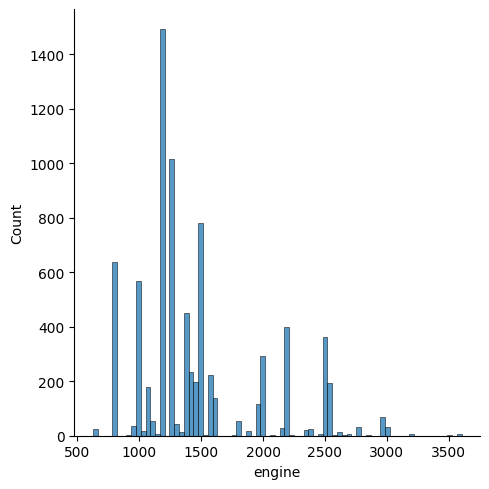

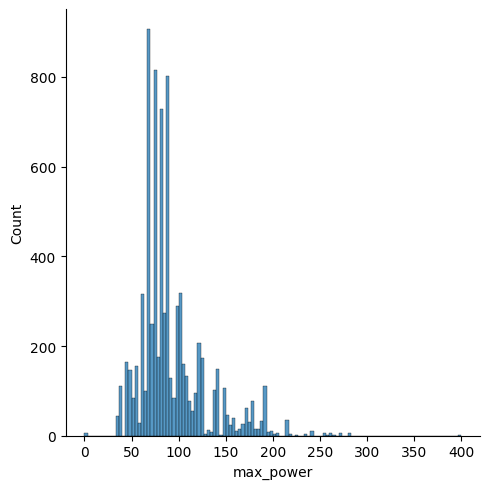

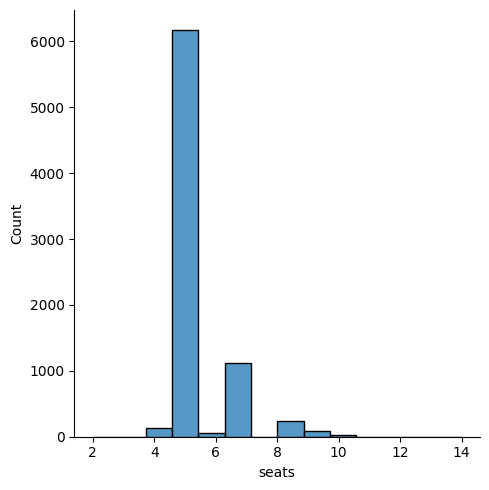

In [40]:
# Using the distribution plot to get the count of all the numeric features except selling_price
for col in dfcopy.columns:
    sns.displot(dfcopy, x=df[col])

# B.2 Multivariate Anaysis

Using multiple variable data analysis to see the trend of data in terms of relationship and majority

# B.2 Scatterplot

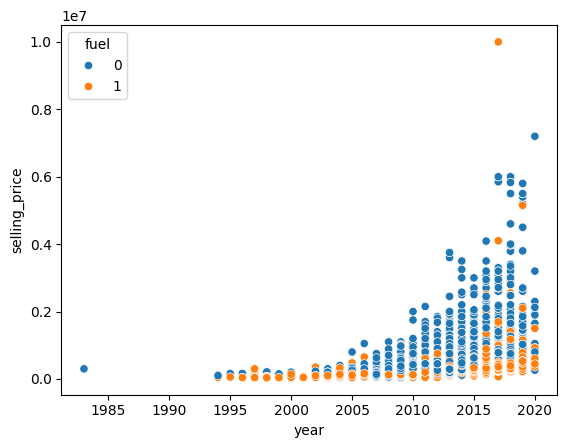

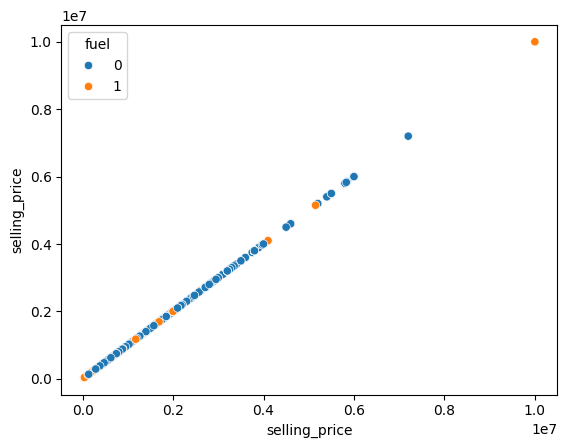

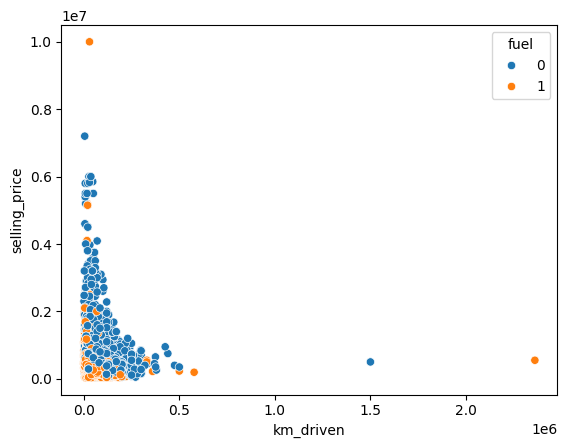

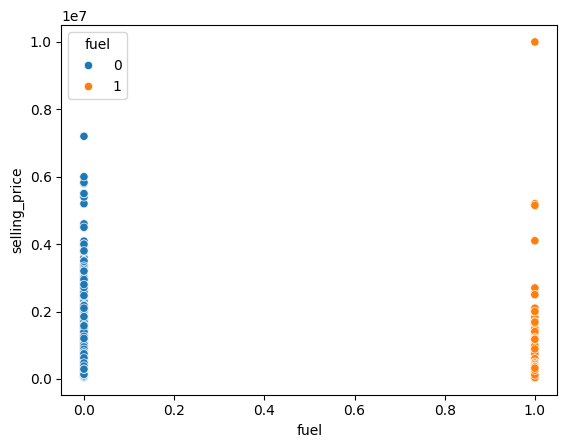

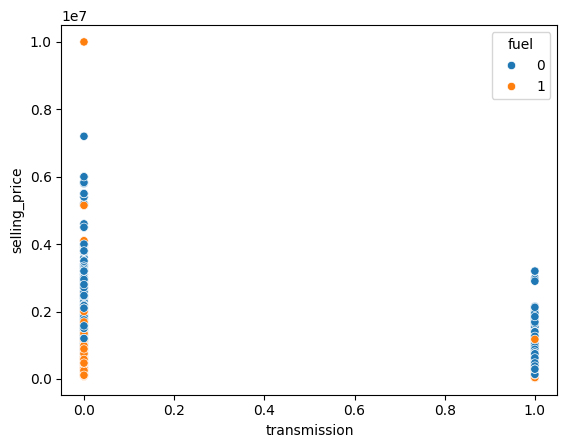

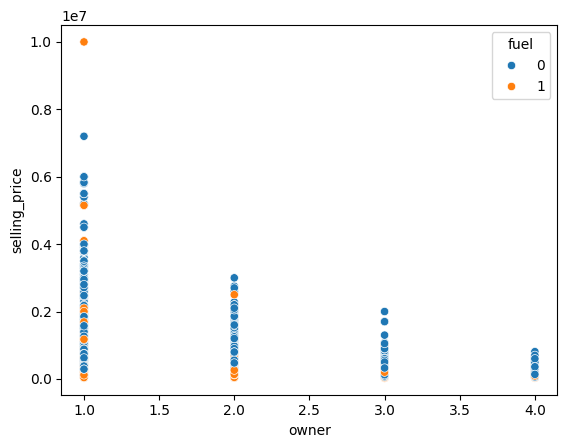

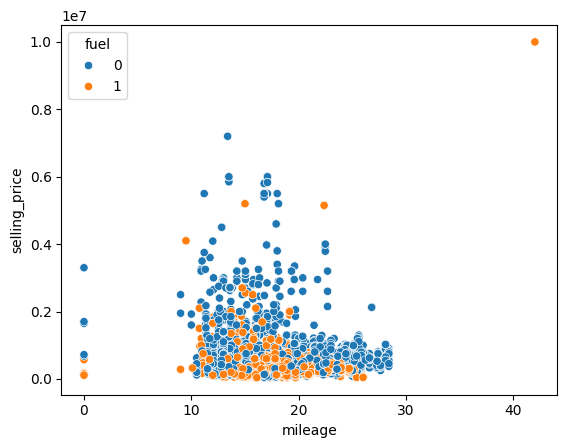

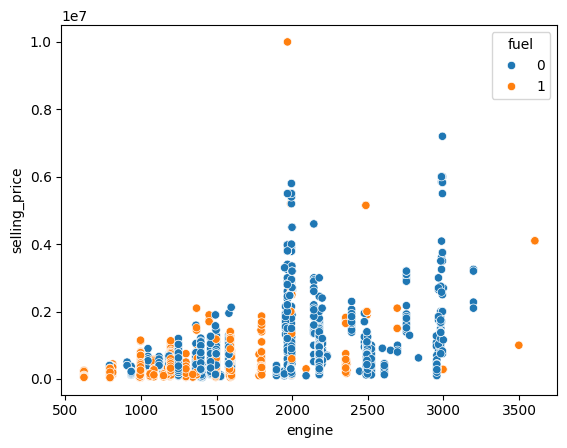

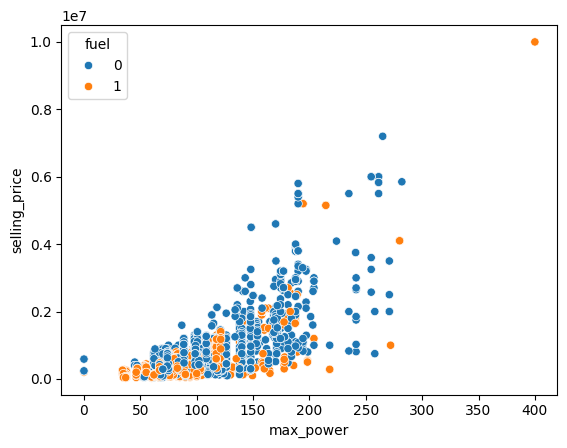

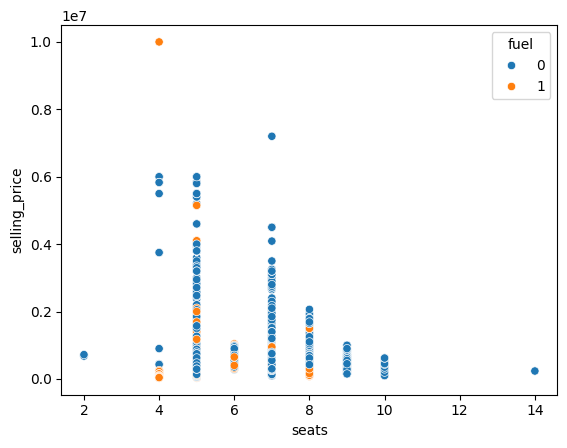

In [41]:
# PLotting the continuous features in the scatter plot against selling_price with fuel as the hue
for col in dfcopy.columns:    
    sns.scatterplot(x=dfcopy[col], y=df['selling_price'], hue=df['fuel'])
    plt.show()

### Correlation Matrices
Identifying the correlation of columns with each other and our target. In order to see which column value is most important for our prediction and also to aviod taking columns with high correlation with each other

<Axes: >

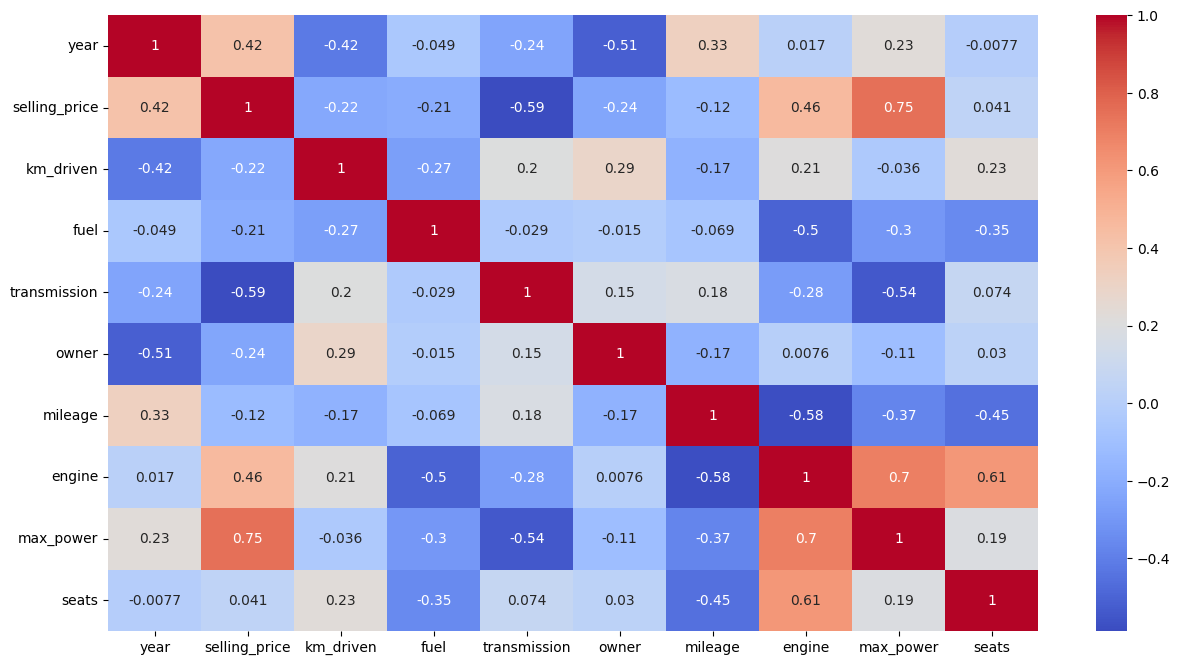

In [42]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Predictive Power Score

Predictive power tells us how much influence does each feature has to the value of selling price

<Axes: xlabel='x', ylabel='y'>

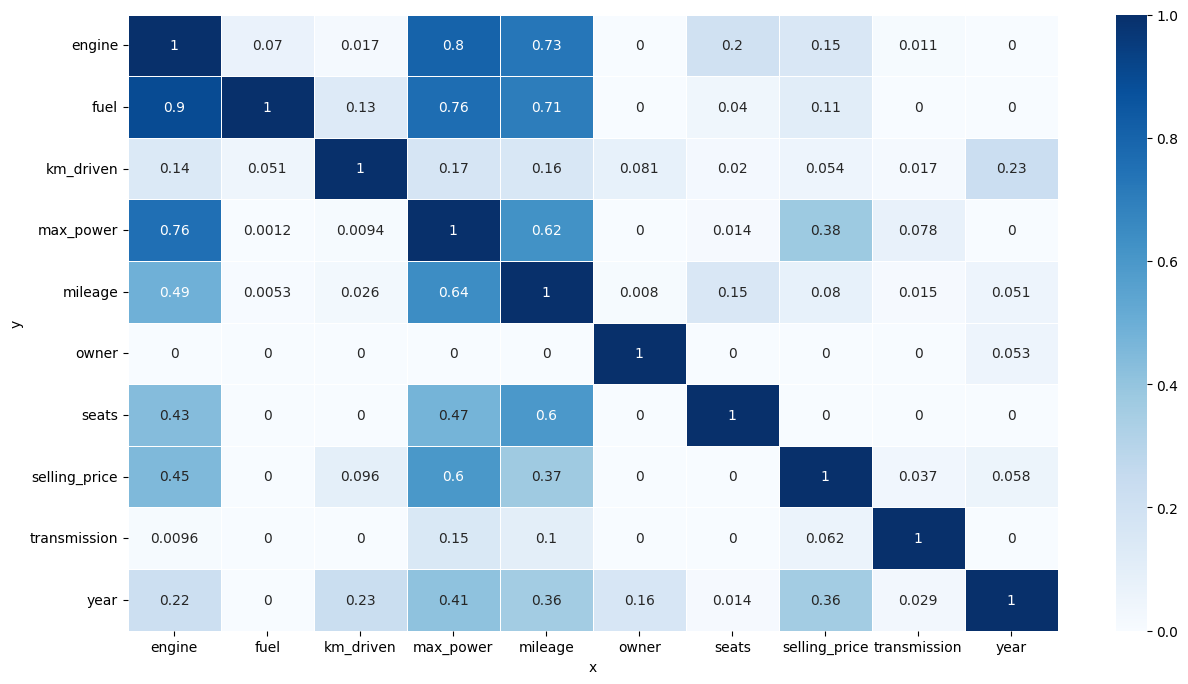

In [43]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Data Preprocessing
Performing some minor precessing such as adding all the encoded columns back and changing the selling price to discrete values

In [44]:
df['selling_price'] = pd.qcut(x=df['selling_price'], q=4, labels=range(0, 4))
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,1,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,0,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,0,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,0,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_cols = ['max_power', 'year', 'fuel','mileage'] + brand_cats
X = df[selected_cols]
y = df['selling_price']

In [46]:
k = len(set(y))
k

4

In [47]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,1,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,0,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,0,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,0,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train test split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Find number of null values for each feature

In [49]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
mileage      171
dtype: int64

In [50]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
mileage      43
dtype: int64

In [51]:
y_train.isna().sum()

0

In [52]:
y_test.isna().sum()

0

### Imputation for max_power

Filling in missing values for max_power using either mean or median

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


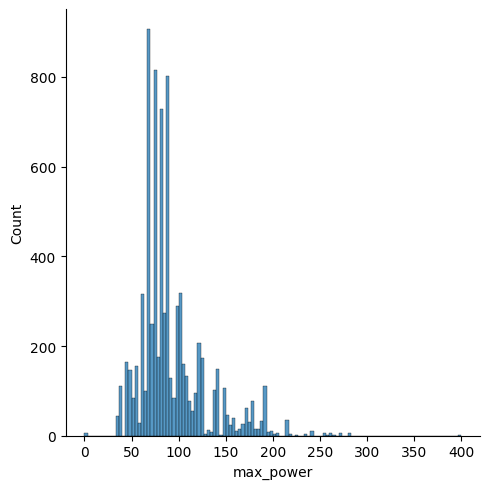

In [53]:
# Let's inspect the distribution plot, mean and median of max_power again
sns.displot(data=df, x='max_power')

print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

max_power distribution appears skewed so median is taken in place of the missing values

In [54]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

Imputing for mileage

Mean of mileage: 19.391961863322244
Median of mileage: 19.3


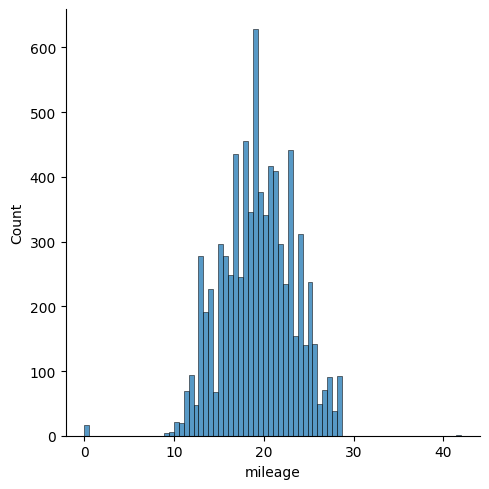

In [55]:
# Let's inspect the distribution plot, mean and median of mileage
sns.displot(data=df, x='mileage')

print(f"Mean of mileage: {df['mileage'].mean()}")
print(f"Median of mileage: {df['mileage'].median()}")

As the distribution of mileage looks bell-shaped curve (normally distributed), the mean is chosen to fill in the missing values

In [56]:
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

### Checking outliers

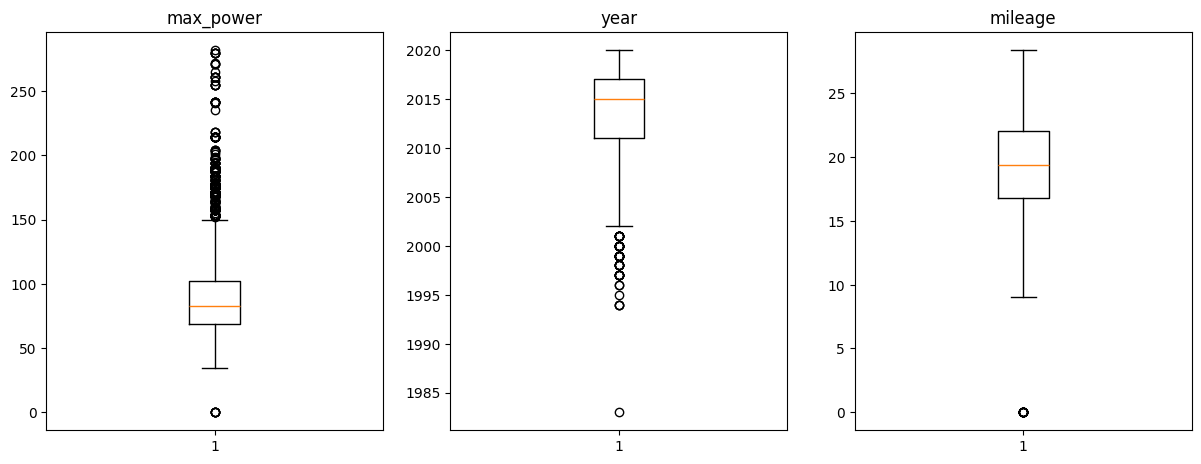

In [57]:
# Create a dictionary of columns.
col_dict = {'max_power': 1,'year': 2, 'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [58]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [59]:
for col in X_train[['max_power', 'year','mileage']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


As the outlier percent looks very small so we are ignoring it and processsing to scalling

### Scaling

As seen in the distribution plots above, all of our numerical features are skewed. Therefore, it is better to do normalization or min/max scaling

In [60]:
from sklearn.preprocessing import StandardScaler

# Define a list of numerical feature names that need to be scaled
num_cols = ['max_power', 'year', 'mileage']

# Create a MinMaxScaler to scale features to a specified range (0 to 1)
scaler = StandardScaler()

# Scale the numerical features in the training dataset (X_train)
# 1. Compute the scaling parameters (minimum and maximum values) based on the training data
# 2. Apply the scaling transformation to the specified columns in X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Scale the same numerical features in the test dataset (X_test)
# 1. Use the scaling parameters learned from the training data to transform X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [61]:
#Encoding of Y_train
Y_train_encoded = pd.get_dummies(y_train)

In [62]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [63]:
# Let's check shapes of all X_train, X_test, Y_train_encoded, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422, 4)
Shape of y_test:  (1606,)


## 4. Modeling

In [66]:
import time
import os
from sklearn.metrics import classification_report
import mlflow

In [67]:
# Set up MLflow tracking
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
os.environ["LOGNAME"] = "st125988"
mlflow.set_experiment("st125988-a3")

2025/10/05 12:35:27 INFO mlflow.tracking.fluent: Experiment with name 'st125988-a3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/273291615863327991', creation_time=1759642518025, experiment_id='273291615863327991', last_update_time=1759642518025, lifecycle_stage='active', name='st125988-a3', tags={}>

# Logistic Regression Model with Advanced Features

This Python class `LogisticRegression` represents a versatile logistic regression model with various options and hyperparameters for customization. It supports functionalities like regularization, learning rate control, optimization methods, and more. Below are the highlights of the class:

## Initialization
The class can be initialized with the following parameters:
- `regularization`: Specifies the regularization method (e.g., L1, L2).
- `k`: Number of classes.
- `n`: Number of features.
- `method`: Chooses the optimization method ('batch', 'sto' for stochastic, 'mini' for mini-batch).
- `alpha`: Sets the learning rate for gradient descent (default is 0.001).
- `max_iter`: Sets the maximum number of training iterations (default is 5000).

## Training
- `fit(X, Y)`: Fits the logistic regression model to the training data using the specified hyperparameters. It performs training with gradient descent, handles regularization, and logs metrics using MLflow.

## Training and Gradient Descent
- `_initialize_weights(n_features)`: Initializes the model's weights.
- `_train(X, Y)`: Performs one training step using gradient descent. Handles regularization.
- `gradient(X, Y)`: Computes the gradient and loss for the logistic regression model.
- `softmax(theta_t_x)`: Computes the softmax probabilities.
- `softmax_grad(X, error)`: Computes the gradient for softmax regression.
- `h_theta(X, W)`: Computes the predicted probabilities.
- `predict(X_test)`: Predicts the class labels for input data.

## Metrics
- `accuracy(y_test, y_pred)`: Computes the classification accuracy.
- `precision(y_test, y_pred, c)`: Computes precision for a specific class `c`.
- `recall(y_test, y_pred, c)`: Computes recall for a specific class `c`.
- `f1_score(y_test, y_pred, c)`: Computes F1-score for a specific class `c`.

## Classification Report
- `classification_report(y_test, y_pred)`: Generates a classification report with precision, recall, and F1-score for each class, as well as accuracy, macro, and weighted metrics.

## Loss Functions
- `losses`: Stores the training loss for each iteration.

## MLflow Logging
- `mlflow.log_params(params)`: Logs the model's hyperparameters.
- `mlflow.log_metric(key, value, step)`: Logs a metric during training.

The class provides flexibility for experimenting with logistic regression models and advanced features, making it suitable for various classification tasks.


In [68]:
class LogisticRegression:
    """
    A logistic regression model with advanced features for classification tasks.
    
    Args:
        regularization (object): Regularization method (e.g., L1, L2).
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'sto' for stochastic, 'mini' for mini-batch).
        alpha (float): Learning rate for gradient descent (default is 0.001).
        max_iter (int): Maximum number of training iterations (default is 5000).

    Attributes:
        regularization: Regularization method object.
        k: Number of classes.
        n: Number of features.
        alpha: Learning rate.
        max_iter: Maximum number of training iterations.
        method: Optimization method.
        W (numpy.ndarray): Model weights.
        losses (list): Training losses.
    """

    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None  # Will be initialized later
        self.losses = []

    def fit(self, X, Y):
        """
        Fit the logistic regression model to the training data.

        Args:
            X (numpy.ndarray): Training data features.
            Y (numpy.ndarray): Training data labels.

        Returns:
            None
        """
        self.W = np.random.rand(self.n, self.k)
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": int(self.k),
            "n": int(self.n),
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])  # With replacement
                batch_X = X[ix:ix + batch_size]
                batch_Y = Y[ix:ix + batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad

                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

    def gradient(self, X, Y):
        """
        Compute the gradient and loss for the logistic regression model.

        Args:
            X (numpy.ndarray): Input data features.
            Y (numpy.ndarray): Input data labels.

        Returns:
            float: Loss.
            numpy.ndarray: Gradient.
        """
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        """
        Compute the softmax probabilities.

        Args:
            theta_t_x (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Softmax probabilities.
        """
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        """
        Compute the gradient for softmax regression.

        Args:
            X (numpy.ndarray): Input data features.
            error (numpy.ndarray): Error.

        Returns:
            numpy.ndarray: Gradient.
        """
        return X.T @ error

    def h_theta(self, X, W):
        """
        Compute the predicted probabilities.

        Args:
            X (numpy.ndarray): Input data features.
            W (numpy.ndarray): Model weights.

        Returns:
            numpy.ndarray: Predicted probabilities.
        """
        return self.softmax(X @ W)

    def predict(self, X_test):
        """
        Predict class labels for input data.

        Args:
            X_test (numpy.ndarray): Input data for prediction.

        Returns:
            numpy.ndarray: Predicted class labels.
        """
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def plot(self):
        """
        Plot the training losses.

        Returns:
            None
        """
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        """
        Compute classification accuracy.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Accuracy.
        """
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = y_test.shape[0]
        return correct_predictions / total_predictions

    def precision(self, y_test, y_pred, c=0):
        """
        Compute precision for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Precision.
        """
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)

    def recall(self, y_test, y_pred, c=0):
        """
        Compute recall for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Recall.
        """
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)

    def f1_score(self, y_test, y_pred, c=0):
        """
        Compute F1-score for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: F1-score.
        """
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)

    def macro_precision(self, y_test, y_pred):
        """
        Compute macro-averaged precision.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged precision.
        """
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k

    def macro_recall(self, y_test, y_pred):
        """
        Compute macro-averaged recall.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged recall.
        """
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k

    def macro_f1(self, y_test, y_pred):
        """
        Compute macro-averaged F1-score.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged F1-score.
        """
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k

    def weighted_precision(self, y_test, y_pred):
        """
        Compute weighted precision.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted precision.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y_test, y_pred):
        """
        Compute weighted recall.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted recall.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y_test, y_pred):
        """
        Compute weighted F1-score.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted F1-score.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)

    def classification_report(self, y_test, y_pred):
        """
        Generate a classification report.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            pandas.DataFrame: Classification report.
        """
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                   self.recall(y_test, y_pred, c),
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                       self.macro_recall(y_test, y_pred),
                       self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                       self.weighted_recall(y_test, y_pred),
                       self.weighted_f1(y_test, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)


The provided code defines classes for the two types of classification techniques in regularization:

RidgePenalty calculates Ridge (L2) regularization penalty and its derivative.
While Normal calcaulates it without any penalty.

In [69]:
class RidgePenalty:
    """Ridge penalty (L2 regularization) for logistic regression.

    Args:
        l (float): Regularization strength.
    """

    def __init__(self, l):
        self.l = l

    def __call__(self, theta):
        """Compute the Ridge penalty term.

        Args:
            theta (numpy.ndarray): Model parameters.

        Returns:
            float: Ridge penalty term.
        """
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        """Compute the derivative of the Ridge penalty.

        Args:
            theta (numpy.ndarray): Model parameters.

        Returns:
            numpy.ndarray: Derivative of the Ridge penalty.
        """
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    """Logistic Regression with Ridge (L2) regularization.

    Args:
        l (float): Regularization strength.
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'minibatch', or 'sto').
        alpha (float, optional): Learning rate (default is 0.001).
        max_iter (int, optional): Maximum number of iterations (default is 5000).
    """

    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    """Logistic Regression without regularization.

    Args:
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'minibatch', or 'sto').
        alpha (float, optional): Learning rate (default is 0.001).
        max_iter (int, optional): Maximum number of iterations (default is 5000).
    """

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)


In [70]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

# Experiment

In [71]:
# Grid search with regularization method (normal and), methods, and alpha values

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.3728360978228988
Loss at iteration 500 5.406048126300999
Loss at iteration 1000 5.3851487710581765
Loss at iteration 1500 5.371991359675895
Loss at iteration 2000 5.365829001025066
Loss at iteration 2500 5.370528208295063
Loss at iteration 3000 5.368680050492233
Loss at iteration 3500 5.366342048680718
Loss at iteration 4000 5.364865370708689
Loss at iteration 4500 5.363739013269047
Loss at iteration 5000 5.36293588470673
Loss at iteration 5500 5.36161553892274
Loss at iteration 6000 5.359506718928467
Loss at iteration 6500 5.357542872072509
Loss at iteration 7000 5.356629260464337
Loss at iteration 7500 5.356183079596202
Loss at iteration 8000 5.35592548864918
Loss at iteration 8500 5.35575718184863
Loss at iteration 9000 5.355638204129466
Loss at iteration 9500 5.355549686942663
time taken: 26.557023286819458


2025/10/05 12:36:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 4.545273042161141
🏃 View run reg-Normal-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/f7276c716c2445ec8604428af05bd4f0
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal batch
alpha: 0.001
Loss at iteration 0 1.5168186702206752
Loss at iteration 500 0.6028924401473639
Loss at iteration 1000 0.601351027416738
Loss at iteration 1500 0.6006786336908152
Loss at iteration 2000 0.6002598224189815
Loss at iteration 2500 0.5999656188802708
Loss at iteration 3000 0.5997405682285102
Loss at iteration 3500 0.5995576753229147
Loss at iteration 4000 0.5994030882205578
Loss at iteration 4500 0.5992692239590889
Loss at iteration 5000 0.5991516044799715
Loss at iteration 5500 0.5990474679210984
Loss at iteration 6000 0.5989551990163344
Loss at iteration 6500 0.5988740036297548
Loss at iteration 7000 0.5988035295957151
Loss at iteration 7500 0.5987434229099095
Loss at iteration 

2025/10/05 12:37:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.5985649117824775
🏃 View run reg-Normal-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/6e96f3eecc264f2198db137e733ecb06
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal batch
alpha: 0.0001
Loss at iteration 0 1.3487709771615635
Loss at iteration 500 0.6516416260024526
Loss at iteration 1000 0.6244199300241433
Loss at iteration 1500 0.6144379716165084
Loss at iteration 2000 0.6096982777814453
Loss at iteration 2500 0.6071300748250118
Loss at iteration 3000 0.6056049900738043
Loss at iteration 3500 0.6046293299063324
Loss at iteration 4000 0.6039632583406233
Loss at iteration 4500 0.6034815606169666
Loss at iteration 5000 0.6031151682187096
Loss at iteration 5500 0.602824209947276
Loss at iteration 6000 0.6025847300268099
Loss at iteration 6500 0.6023817966330002
Loss at iteration 7000 0.6022057749808012
Loss at iteration 7500 0.6020502401764721
Loss at iterati

2025/10/05 12:38:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6014623436623728
🏃 View run reg-Normal-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/a90a3f4152cd44a19f919c168cb0b830
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
🏃 View run reg-Normal-method-batch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/8ab4d516865f4aaea9d88a31b334cf35
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal minibatch
alpha: 0.01
Loss at iteration 0 1.534457237195579
Loss at iteration 500 1.708749608210494
Loss at iteration 1000 0.963191654589111
Loss at iteration 1500 1.6393930459831227
Loss at iteration 2000 1.268712416900096
Loss at iteration 2500 1.6339975842060106
Loss at iteration 3000 1.6383606606901837
Loss at iteration 3500 0.8477068994753737
Loss at iteration 4000 1.1820814219466549
Loss at iteration 4500 0.7649404744140724
Loss at iteration 5000 0.853

2025/10/05 12:38:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.3898041950233941
🏃 View run reg-Normal-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/7e1296e38a1146198c89130a918b50c9
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal minibatch
alpha: 0.001
Loss at iteration 0 1.4293980109505724
Loss at iteration 500 0.6086583537332788
Loss at iteration 1000 0.6095069893764842
Loss at iteration 1500 0.6121748027516631
Loss at iteration 2000 0.6063694569963062
Loss at iteration 2500 0.599839629959707
Loss at iteration 3000 0.62595997871451
Loss at iteration 3500 0.5878698662598294
Loss at iteration 4000 0.6047305622816388
Loss at iteration 4500 0.6048593262230845
Loss at iteration 5000 0.5932707106893446
Loss at iteration 5500 0.5863835169897611
Loss at iteration 6000 0.5898107453685232
Loss at iteration 6500 0.5869216488620571
Loss at iteration 7000 0.6047347651155422
Loss at iteration 7500 0.5196036420061896
Loss at ite

2025/10/05 12:39:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6044298523001879
🏃 View run reg-Normal-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/b1c1c4ab15934775a01a1b8d7e9d37e2
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal minibatch
alpha: 0.0001
Loss at iteration 0 1.6760567293848652
Loss at iteration 500 0.7352108978929883
Loss at iteration 1000 0.6851423610100071
Loss at iteration 1500 0.6549187069200373
Loss at iteration 2000 0.6528318361006729
Loss at iteration 2500 0.6311062050309976
Loss at iteration 3000 0.6337567563063047
Loss at iteration 3500 0.6454655960930535
Loss at iteration 4000 0.619742501628139
Loss at iteration 4500 0.6096936189906073
Loss at iteration 5000 0.6282962314096117
Loss at iteration 5500 0.6240518559174804
Loss at iteration 6000 0.6370106470995565
Loss at iteration 6500 0.6151150820968384
Loss at iteration 7000 0.5990038971170709
Loss at iteration 7500 0.5876905023160821
Loss at

2025/10/05 12:39:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.607947658437594
🏃 View run reg-Normal-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/db21cd9117784b13a6a65ee882d591da
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
🏃 View run reg-Normal-method-minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/fd7de479e4f24817a24f8b0d912f0ba6
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal sto
alpha: 0.01
Loss at iteration 0 1.5668026771871888
Loss at iteration 500 1.2242022877249348
Loss at iteration 1000 2.086443373055257
Loss at iteration 1500 1.4799265664781258
Loss at iteration 2000 1.2693938666216773
Loss at iteration 2500 0.976363880165371
Loss at iteration 3000 1.0582063778199826
Loss at iteration 3500 0.5728429451388988
Loss at iteration 4000 0.8530229018556728
Loss at iteration 4500 0.12063729461394301
Loss at iteration 5000 1

2025/10/05 12:40:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.20947112965633305
🏃 View run reg-Normal-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/b7bece37ba2547d1be47a3837fc5c13f
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal sto
alpha: 0.001
Loss at iteration 0 1.3991195756995423
Loss at iteration 500 0.9296840507987342
Loss at iteration 1000 0.8619238439334524
Loss at iteration 1500 1.427902235196275
Loss at iteration 2000 1.1883026598500952
Loss at iteration 2500 1.0908684038627556
Loss at iteration 3000 1.251180791239987
Loss at iteration 3500 0.32755852766556515
Loss at iteration 4000 1.6523093598494187
Loss at iteration 4500 0.8801367827640615
Loss at iteration 5000 0.19794934991782545
Loss at iteration 5500 1.7796089948472418
Loss at iteration 6000 0.9905291329352617
Loss at iteration 6500 1.218412012086383
Loss at iteration 7000 1.3053277481552306
Loss at iteration 7500 0.33184079940196476
Loss at iteration 8

2025/10/05 12:40:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.9087296451440275
🏃 View run reg-Normal-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/2c69e9dd1de14419bf50fa3c7aa87ef8
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Normal sto
alpha: 0.0001
Loss at iteration 0 1.3724211180798327
Loss at iteration 500 1.1416345879582857
Loss at iteration 1000 1.2427936212499908
Loss at iteration 1500 1.6773280511232658
Loss at iteration 2000 1.1680795299751126
Loss at iteration 2500 1.3086812427992391
Loss at iteration 3000 1.202429715831959
Loss at iteration 3500 1.278467172034297
Loss at iteration 4000 1.0509496888383907
Loss at iteration 4500 1.9553753600386552
Loss at iteration 5000 2.001448450650969
Loss at iteration 5500 1.2340492730584152
Loss at iteration 6000 1.1863021511708747
Loss at iteration 6500 1.1238244886878348
Loss at iteration 7000 1.8586766877508252
Loss at iteration 7500 1.19412140469139
Loss at iteration 8000 

2025/10/05 12:41:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.5581217707491201
🏃 View run reg-Normal-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/5c9994097d4d41a79c449961f8f1a30a
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
🏃 View run reg-Normal-method-sto at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/7bc25a63766749989f95ec1360d211a4
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge batch
alpha: 0.01
Loss at iteration 0 1.6246788836651973
Loss at iteration 500 5.507365319372935
Loss at iteration 1000 5.50914960505081
Loss at iteration 1500 5.508965484051273
Loss at iteration 2000 5.508840256878666
Loss at iteration 2500 5.508796988235879
Loss at iteration 3000 5.508782788309328
Loss at iteration 3500 5.508778071172095
Loss at iteration 4000 5.508776474962997
Loss at iteration 4500 5.508775926062104
Loss at iteration 5000 5.508775734864642
Lo

2025/10/05 12:41:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 4.899729592073054
🏃 View run reg-Ridge-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/3a4cb4b722884e19a0f53db5f4555277
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge batch
alpha: 0.001
Loss at iteration 0 1.525336955193157
Loss at iteration 500 0.6036041589857559
Loss at iteration 1000 0.6019227201673557
Loss at iteration 1500 0.6012892985498928
Loss at iteration 2000 0.6009297796723447
Loss at iteration 2500 0.6006979161174043
Loss at iteration 3000 0.6005370979685875
Loss at iteration 3500 0.6004197773350515
Loss at iteration 4000 0.6003310153940441
Loss at iteration 4500 0.6002620513998906
Loss at iteration 5000 0.6002074051445642
Loss at iteration 5500 0.6001634573385127
Loss at iteration 6000 0.6001277068754707
Loss at iteration 6500 0.6000983599227677
Loss at iteration 7000 0.6000740909240974
Loss at iteration 7500 0.6000538969396253
Loss at iteration 80

2025/10/05 12:42:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.5999920936345923
🏃 View run reg-Ridge-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/59fce3ea760c4724827c9badb8308288
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge batch
alpha: 0.0001
Loss at iteration 0 1.3549012452206262
Loss at iteration 500 0.651716986125089
Loss at iteration 1000 0.6249940414851477
Loss at iteration 1500 0.6151157486373048
Loss at iteration 2000 0.6104131225908399
Loss at iteration 2500 0.6078451889542145
Loss at iteration 3000 0.6063007681941258
Loss at iteration 3500 0.6052976070734531
Loss at iteration 4000 0.6046025898773246
Loss at iteration 4500 0.6040940284731693
Loss at iteration 5000 0.6037044445434667
Loss at iteration 5500 0.6033944612484748
Loss at iteration 6000 0.6031400382113644
Loss at iteration 6500 0.6029258833891947
Loss at iteration 7000 0.602741897085968
Loss at iteration 7500 0.602581176283214
Loss at iteration 8

2025/10/05 12:43:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6019952310638615
🏃 View run reg-Ridge-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/23874bf12d624688ae92c5f0fef400d2
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
🏃 View run reg-Ridge-method-batch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/905e9ca0996348a7a5df4d87ab7ea59f
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge minibatch
alpha: 0.01
Loss at iteration 0 1.4681268693246678
Loss at iteration 500 1.53300116318384
Loss at iteration 1000 1.6599646199156453
Loss at iteration 1500 0.9559146697769545
Loss at iteration 2000 1.6404885176264277
Loss at iteration 2500 0.6630542934865571
Loss at iteration 3000 0.7138549774234193
Loss at iteration 3500 1.6501996651157422
Loss at iteration 4000 0.80738450590527
Loss at iteration 4500 1.567007590973149
Loss at iteration 5000 1.6912154

2025/10/05 12:43:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.877700732011454
🏃 View run reg-Ridge-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/e37ebab926bd4a92ae47d59f29d688d3
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge minibatch
alpha: 0.001
Loss at iteration 0 1.7283676590503827
Loss at iteration 500 0.6082509020037984
Loss at iteration 1000 0.6077510056317657
Loss at iteration 1500 0.5943598410042856
Loss at iteration 2000 0.6121487671334177
Loss at iteration 2500 0.5976537042091414
Loss at iteration 3000 0.5924817186047385
Loss at iteration 3500 0.6181002122651952
Loss at iteration 4000 0.6330495562428167
Loss at iteration 4500 0.5935700600697859
Loss at iteration 5000 0.5994723829645986
Loss at iteration 5500 0.6066507379680277
Loss at iteration 6000 0.6200090949290148
Loss at iteration 6500 0.6049961113659675
Loss at iteration 7000 0.6105588655906017
Loss at iteration 7500 0.6071450273341288
Loss at ite

2025/10/05 12:44:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.6053928412450167
🏃 View run reg-Ridge-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/78c336171b79406ea399419632a2522b
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge minibatch
alpha: 0.0001
Loss at iteration 0 1.4615057273852559
Loss at iteration 500 0.7260968965042335
Loss at iteration 1000 0.6857976657191585
Loss at iteration 1500 0.6599846341462805
Loss at iteration 2000 0.652726220227946
Loss at iteration 2500 0.6443054063484049
Loss at iteration 3000 0.6461903129935329
Loss at iteration 3500 0.6453588865580097
Loss at iteration 4000 0.6171760287411358
Loss at iteration 4500 0.6205359920328349
Loss at iteration 5000 0.6037421164430256
Loss at iteration 5500 0.6160117821596677
Loss at iteration 6000 0.6157699702559336
Loss at iteration 6500 0.6082715627662943
Loss at iteration 7000 0.6215087333398214
Loss at iteration 7500 0.6097361600750023
Loss at i

2025/10/05 12:44:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 0.608080155931563
🏃 View run reg-Ridge-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/7a495534bb2b425596ba281223293a79
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
🏃 View run reg-Ridge-method-minibatch at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/5d64fe6cb4e84c0aaedda77d40761c91
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge sto
alpha: 0.01
Loss at iteration 0 1.6622300707497077
Loss at iteration 500 1.1200056021469036
Loss at iteration 1000 0.7919924947526854
Loss at iteration 1500 1.3200869303725675
Loss at iteration 2000 1.022292421759733
Loss at iteration 2500 1.029101765058878
Loss at iteration 3000 1.4846809171756497
Loss at iteration 3500 0.9935380975795933
Loss at iteration 4000 0.27905273654644275
Loss at iteration 4500 0.4176496529892354
Loss at iteration 5000 0.33

2025/10/05 12:45:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.3051550258113862
🏃 View run reg-Ridge-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/6f5eeca3ea5b44ff8fcf89c5a2ba4c5e
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge sto
alpha: 0.001
Loss at iteration 0 1.1310915278615044
Loss at iteration 500 1.0487917812352425
Loss at iteration 1000 1.250720790382561
Loss at iteration 1500 0.9237826607731965
Loss at iteration 2000 1.4763331455790123
Loss at iteration 2500 1.337621327543668
Loss at iteration 3000 0.5303234362804442
Loss at iteration 3500 1.4191350517346641
Loss at iteration 4000 0.6474529421619688
Loss at iteration 4500 0.8850209755642862
Loss at iteration 5000 1.3623466975095166
Loss at iteration 5500 1.3553912067185159
Loss at iteration 6000 1.6831408827109053
Loss at iteration 6500 1.2018972289967185
Loss at iteration 7000 1.16926014855766
Loss at iteration 7500 1.0696628276279765
Loss at iteration 8000 0.2

2025/10/05 12:45:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.1010368935312782
🏃 View run reg-Ridge-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/532e47ce80c74e48bd8a0d9d92cd1556
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
Ridge sto
alpha: 0.0001
Loss at iteration 0 1.0647164434018894
Loss at iteration 500 0.8681279628030992
Loss at iteration 1000 1.2904293891800667
Loss at iteration 1500 1.8445621051240326
Loss at iteration 2000 1.726300295154805
Loss at iteration 2500 0.9795297622391067
Loss at iteration 3000 1.849925909192042
Loss at iteration 3500 1.854578350600071
Loss at iteration 4000 1.3605812494453868
Loss at iteration 4500 1.246894891221895
Loss at iteration 5000 1.777271665493234
Loss at iteration 5500 0.6950752823903866
Loss at iteration 6000 1.2177617627982629
Loss at iteration 6500 1.321761761543934
Loss at iteration 7000 1.0221196266760846
Loss at iteration 7500 1.5519300031632386
Loss at iteration 8000 0.7

2025/10/05 12:46:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Final Training Loss: 1.9446212359979418
🏃 View run reg-Ridge-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/c92e496ee82545fe9ed8f243fc17b408
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991
🏃 View run reg-Ridge-method-sto at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991/runs/cf4270b7c0904ba8b4d4cf5354015aca
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/273291615863327991


# Finding the best model and comparing its confusion matrix with custom and sklearn and also presenting the graph (Testing)

**********
Best Model:
Regularization: Normal
Method: sto
Final Training Loss: 0.20947112965633305
**********


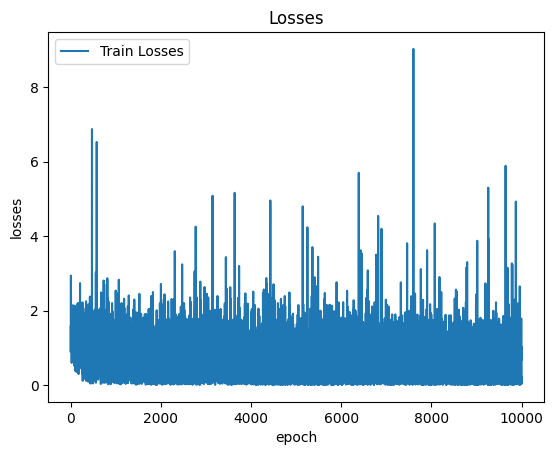

In [72]:
# Plotting the loss graph the graph of the best model
print("*" * 10)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("*" * 10)
best_model.plot()
plt.show()

In [73]:
from sklearn.metrics import classification_report as sklearn_classification_report

# Assuming best_model is already defined based on the previous code

# Use the best model to predict
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 5, "Custom Classification report", "*" * 5)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("*" * 5, "Sklearn's Classification report", "*" * 5)
print(sklearn_report)

***** Custom Classification report *****
         precision    recall  f1-score
0         0.702703  0.948905  0.807453
1         0.705036  0.429825  0.534060
2         0.542614  0.542614  0.542614
3         0.779097  0.847545  0.811881
accuracy                      0.688045
macro     0.682362  0.692222  0.674002
weighted  0.686686  0.688045  0.672847


***** Sklearn's Classification report *****
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       411
           1       0.71      0.43      0.53       456
           2       0.54      0.54      0.54       352
           3       0.78      0.85      0.81       387

    accuracy                           0.69      1606
   macro avg       0.68      0.69      0.67      1606
weighted avg       0.69      0.69      0.67      1606



The reports are very close to one another hence we can safely say the custom model is serving its purpose

# Testing
Testing registererd model at MLFlow

In [80]:
# Register and stage the best model
from mlflow import MlflowClient

client = MlflowClient()
model_name = "st125988-a3-model"

# Find the best run
experiment = client.get_experiment_by_name("st125988-a3")
if experiment:
    runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["metrics.accuracy DESC"],
        max_results=1
    )
    
    if runs:
        best_run = runs[0]
        print(f"Best run ID: {best_run.info.run_id}")
        print(f"Best accuracy: {best_run.data.metrics['accuracy']:.4f}")
        
        try:
            # Create registered model if it doesn't exist
            try:
                client.create_registered_model(model_name)
                print(f"✅ Created registered model: {model_name}")
            except:
                print(f"ℹ️ Model {model_name} already exists")
            
            # Create model version
            model_version = client.create_model_version(
                name=model_name,
                source=f"runs:/{best_run.info.run_id}/a3_model_artifacts.pkl",
                run_id=best_run.info.run_id
            )
            
            print(f"✅ Created model version: {model_version.version}")
            
            # Transition to Staging
            client.transition_model_version_stage(
                name=model_name,
                version=model_version.version,
                stage="Staging"
            )
            
            print(f"✅ Model version {model_version.version} transitioned to Staging")
            print(f"🌐 View model: http://mlflow.ml.brain.cs.ait.ac.th/#/models/{model_name}")
            
        except Exception as e:
            print(f"❌ Error in model registration: {e}")

print("\n   Model artifacts saved locally and ready for deployment!")


Best run ID: b1c1c4ab15934775a01a1b8d7e9d37e2
Best accuracy: 0.7503


2025/10/05 15:08:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125988-a3-model, version 1


✅ Created registered model: st125988-a3-model
✅ Created model version: 1
✅ Model version 1 transitioned to Staging
🌐 View model: http://mlflow.ml.brain.cs.ait.ac.th/#/models/st125988-a3-model

   Model artifacts saved locally and ready for deployment!


In [82]:
import pickle
# Save the best model for web app
if best_model:
    with open('model_artifacts.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    
    print("✅ Best model artifacts saved as 'model_artifacts.pkl'")
    print("🚀 Model ready for deployment!")
else:
    print("❌ No best model found")

✅ Best model artifacts saved as 'model_artifacts.pkl'
🚀 Model ready for deployment!


# Inference

In [85]:
# Create a new dataframe we are going to perform inference with 
sample_df = pd.DataFrame([[107, 2017,100, 0, 'BMW']],
                         columns=['max_power', 'year','mileage', 'fuel', 'brand'])
sample_df

,max_power,year,mileage,fuel,brand
0,107,2017,100,0,BMW


In [86]:
# Encode and scale each feature
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

,max_power,year,mileage,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,107,2017,100,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
